In [107]:
# Importando as bibliotecas
import pandas as pd
from matplotlib import pyplot as plt
low_memory=False
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

In [108]:
# Definindo funções que usaremos no futuro
# Recebe duas lista, cria uma relação entre elas e organiza, retorna duas listas: x e y
def mysort(x, y, r):
  d = {}
  for a in range(27):
    d[x[a]] = y[a] 
  d = sorted(d.items(), key = lambda x:x[1], reverse=r)
  x = []
  y = []
  for a in d:
    x.append(a[0])
    y.append(a[1])
  return x, y

In [109]:
# Criando nosso dataframe
df = pd.read_csv("caso.csv")

In [110]:
 df.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-06-27,AC,NaN,state,12913,351,103,True,881935.0,12.0,1464.16686,0.0272
1,2020-06-26,AC,NaN,state,12644,343,102,False,881935.0,12.0,1433.66575,0.0271
2,2020-06-25,AC,NaN,state,12304,335,101,False,881935.0,12.0,1395.11415,0.0272
3,2020-06-24,AC,NaN,state,12022,326,100,False,881935.0,12.0,1363.13901,0.0271
4,2020-06-23,AC,NaN,state,11810,321,99,False,881935.0,12.0,1339.10095,0.0272


In [111]:
print(f'linhas: {df.shape[0]}\nColunas: {df.shape[1]}')

linhas: 267999
Colunas: 12


In [112]:
# Removendo as colunas que não vamos usar
df = df.drop(["order_for_place",
              "estimated_population_2019",
              "city_ibge_code"], 
             axis=1)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267999 entries, 0 to 267998
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            267999 non-null  object 
 1   state                           267999 non-null  object 
 2   city                            265181 non-null  object 
 3   place_type                      267999 non-null  object 
 4   confirmed                       267999 non-null  int64  
 5   deaths                          267999 non-null  int64  
 6   is_last                         267999 non-null  bool   
 7   confirmed_per_100k_inhabitants  260245 non-null  float64
 8   death_rate                      267999 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 12.5+ MB


Text(0, 0.5, 'número de casos confirmados')

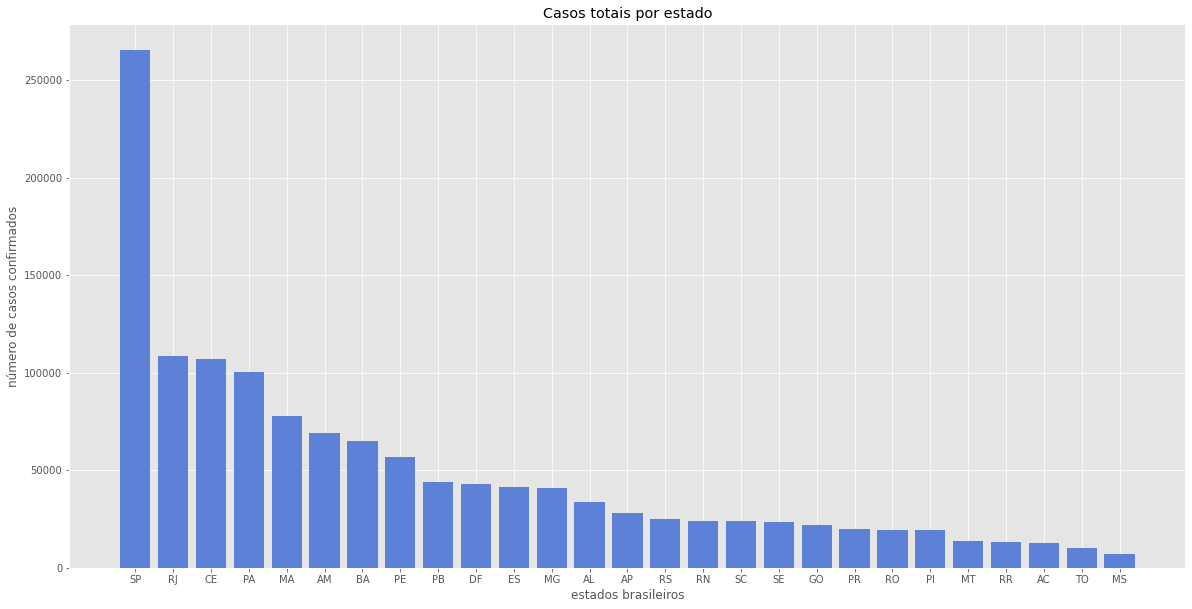

In [114]:
# Criando eixo x e y
x = list(df.query('place_type == "state" and is_last == True')['state'].values)
y = list(df.query('place_type == "state" and is_last == True')['confirmed'].values)
x, y = mysort(x, y, True)

# Criando um gráfico
plt.style.use("ggplot")
plt.figure(figsize = (20, 10))
plt.bar(x, y, color='#5c81d6')

# Atribuindo um título ao gráfico
plt.title('Casos totais por estado')

# Descrição do grafico
plt.xlabel('estados brasileiros')
plt.ylabel('número de casos confirmados')


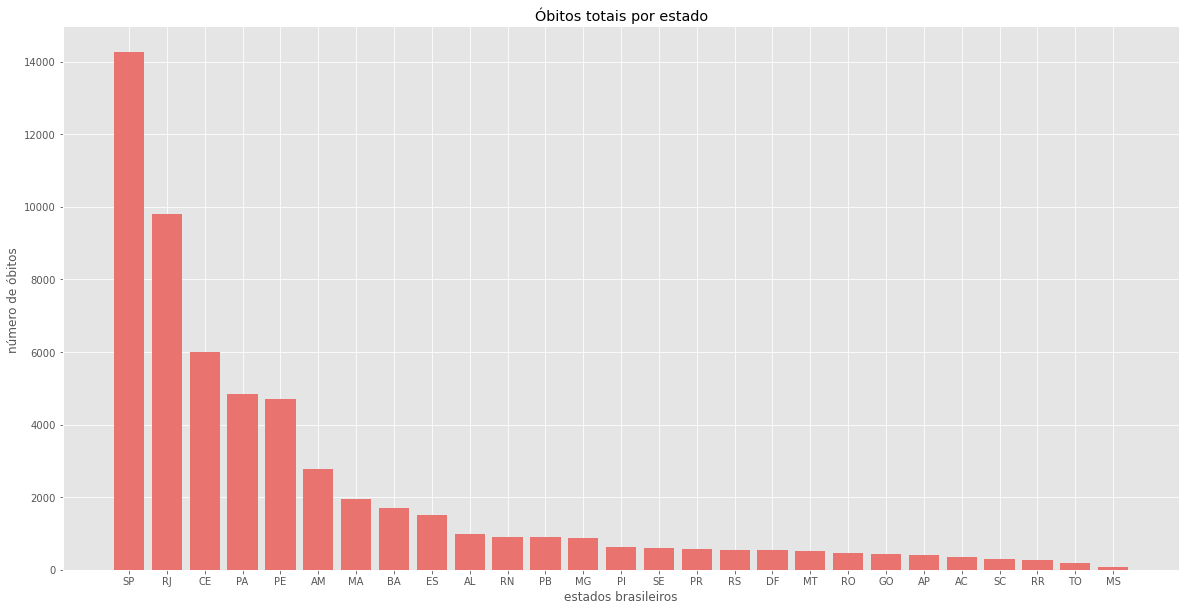

In [115]:
# Criando eixo x e y 
x = list(df.query('place_type == "state" and is_last == True')['state'].values)
y = list(df.query('place_type == "state" and is_last == True')['deaths'].values)
x, y = mysort(x, y, True)

# Criando um gráfico
plt.style.use("ggplot")
plt.figure(figsize = (20, 10))
plt.bar(x, y, color='#e8736f')

# Atribuindo um título ao gráfico
plt.title('Óbitos totais por estado')

# Descrição do grafico
plt.xlabel('estados brasileiros')
plt.ylabel('número de óbitos ')

plt.show()

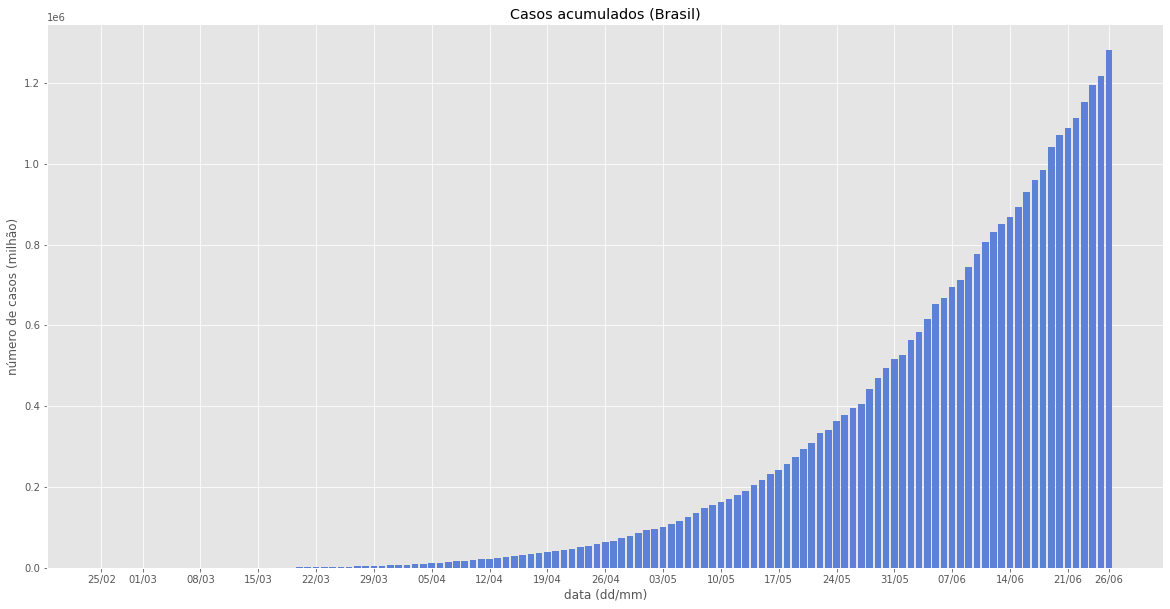

In [116]:
# Criando eixo x e y 
x = list(set(df.query('place_type == "state"')['date'].values))
x.remove('2020-06-27') # ATENÇÃO OS DADOS DESTE DIA ESTÃO INCOMPLETOS
x.sort()
y = []
y2 = []
for date in x:
  y.append(sum(df.query(f'place_type == "state" and date == "{date}"')['confirmed'].values))
  y2.append(sum(df.query(f'place_type == "state" and date == "{date}"')['deaths'].values))
for a in range(len(x)): 
  x[a] = x[a].split('-')[2] +'/'+ x[a].split('-')[1]

# Criando um gráfico
plt.style.use("ggplot")
plt.figure(figsize = (20, 10))
plt.bar(x, y, color='#5c81d6', label='casos')
plt.xticks('''25/02 01/03 08/03 15/03 22/03 29/03 05/04 
              12/04 19/04 26/04 03/05 10/05 17/05 24/05
              31/05 07/06 14/06 21/06 26/06'''.split())

# Atribuindo um título ao gráfico
plt.title('Casos acumulados (Brasil)')

# Descrição do grafico
plt.ylabel('número de casos (milhão)')
plt.xlabel('data (dd/mm)')

plt.show()

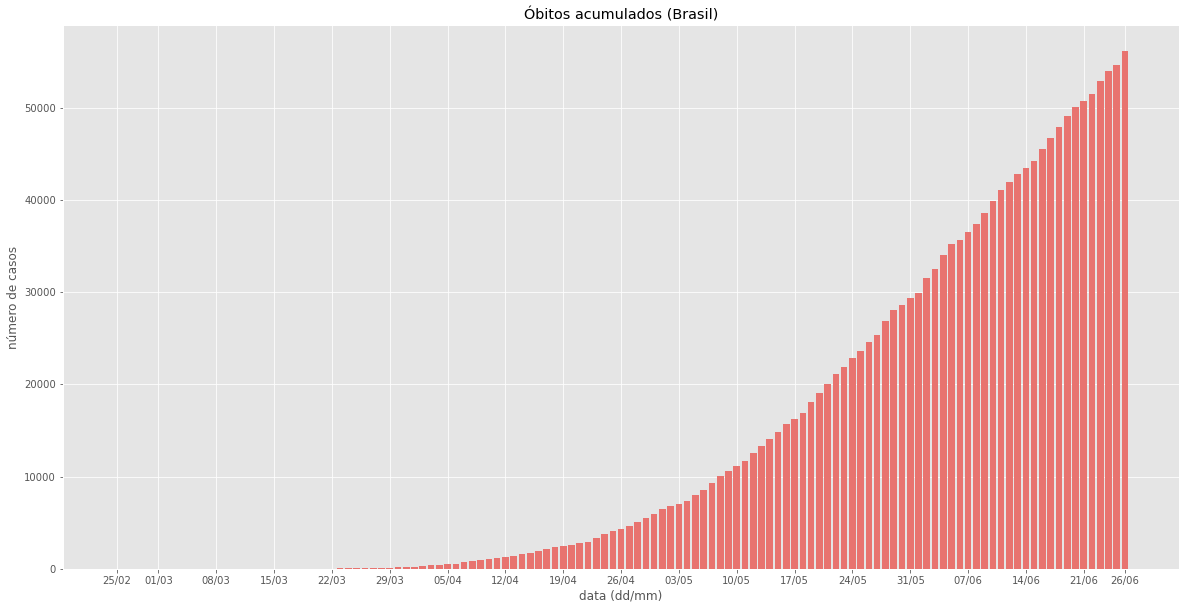

In [117]:
# Criando um gráfico
plt.style.use("ggplot")
plt.figure(figsize = (20, 10))
plt.bar(x, y2, color='#e8736f', label='óbitos')
plt.xticks('''25/02 01/03 08/03 15/03 22/03 29/03 05/04 
              12/04 19/04 26/04 03/05 10/05 17/05 24/05
              31/05 07/06 14/06 21/06 26/06'''.split())

# Atribuindo um título ao gráfico
plt.title('Óbitos acumulados (Brasil)')

# Descrição do grafico
plt.ylabel('número de casos')
plt.xlabel('data (dd/mm)')

plt.show()

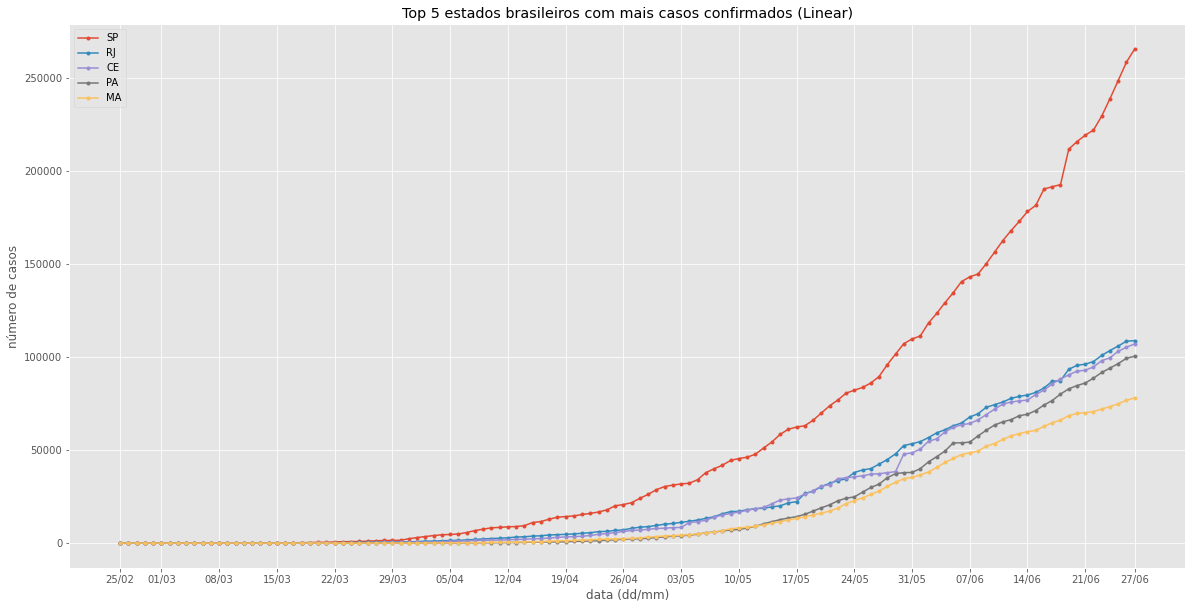

In [118]:
# Criando nossa estrutura de dados
dates = list(set(df.query('place_type == "state"')['date'].values))
dates.sort()

x = []
for a in range(len(dates)): 
  x.append(dates[a].split('-')[2] +'/'+ dates[a].split('-')[1])
grh = []
states = 'SP RJ CE PA MA'.split()
for state in states:
  y = []
  for date in dates:
    casos = df.query(f'place_type == "state" and date == "{date}" and state == "{state}"')['confirmed'].values
    if len(casos) == 0:
      casos = -1
    else:
      casos = casos[0]
    y.append(casos)
  grh.append({state: (x, y)})  #grh := [UF: (data, casos), ...]


# Criando o grafico
plt.figure(figsize = (20, 10))
for e in grh:
  UF = list(e.keys())[0] 
  x = list(e.values())[0][0]
  y = list(e.values())[0][1]
  plt.plot(x, y, '.-', label=UF)

plt.xticks('''25/02 01/03 08/03 15/03 22/03 29/03 05/04 
              12/04 19/04 26/04 03/05 10/05 17/05 24/05
              31/05 07/06 14/06 21/06 27/06'''.split())

# Atribuindo um título ao gráfico
plt.title('Top 5 estados brasileiros com mais casos confirmados (Linear)')

# Descrição do grafico
plt.ylabel('número de casos')
plt.xlabel('data (dd/mm)')

plt.legend()
plt.show()

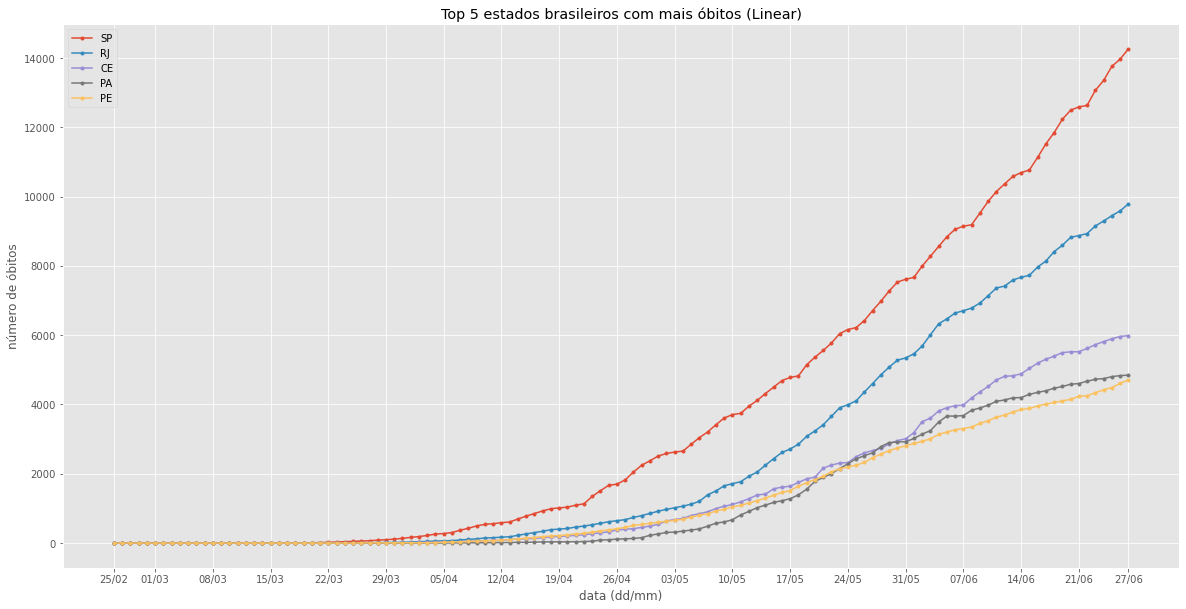

In [119]:
# Criando nossa estrutura de dados
dates = list(set(df.query('place_type == "state"')['date'].values))
dates.sort()

x = []
for a in range(len(dates)): 
  x.append(dates[a].split('-')[2] +'/'+ dates[a].split('-')[1])
grh = []
states = 'SP RJ CE PA PE'.split()
for state in states:
  y = []
  for date in dates:
    casos = df.query(f'place_type == "state" and date == "{date}" and state == "{state}"')['deaths'].values
    if len(casos) == 0:
      casos = -1
    else:
      casos = casos[0]
    y.append(casos)
  grh.append({state: (x, y)})  #grh := [UF: (data, casos), ...]


# Criando o grafico
plt.figure(figsize = (20, 10))
for e in grh:
  UF = list(e.keys())[0] 
  x = list(e.values())[0][0]
  y = list(e.values())[0][1]
  plt.plot(x, y, '.-', label=UF)

plt.xticks('''25/02 01/03 08/03 15/03 22/03 29/03 05/04 
              12/04 19/04 26/04 03/05 10/05 17/05 24/05
              31/05 07/06 14/06 21/06 27/06'''.split())

# Atribuindo um título ao gráfico
plt.title('Top 5 estados brasileiros com mais óbitos (Linear)')

# Descrição do grafico
plt.ylabel('número de óbitos')
plt.xlabel('data (dd/mm)')

plt.legend()
plt.show()